In [1]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ins = pd.read_csv("insurance.csv")

In [5]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:>

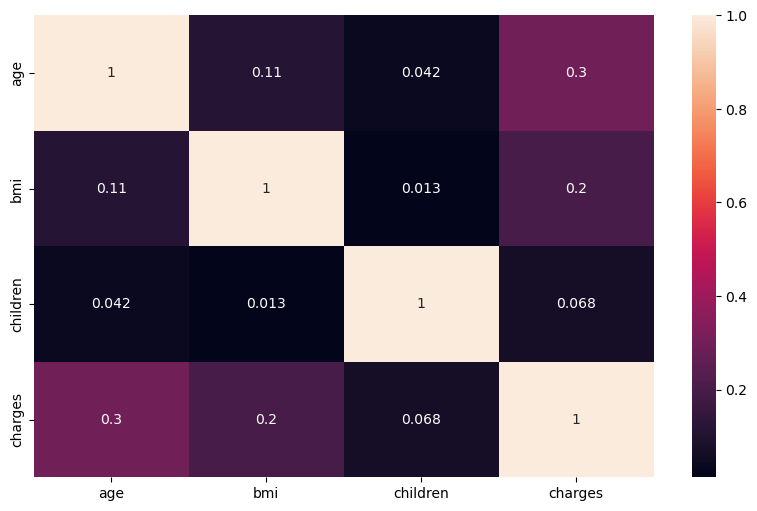

In [24]:
corr=ins.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [26]:
ins_numerical = ins.select_dtypes(['int64' , 'float64'])
ins_numerical

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [16]:
ins_categorical = ins.select_dtypes('object')
ins_categorical

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


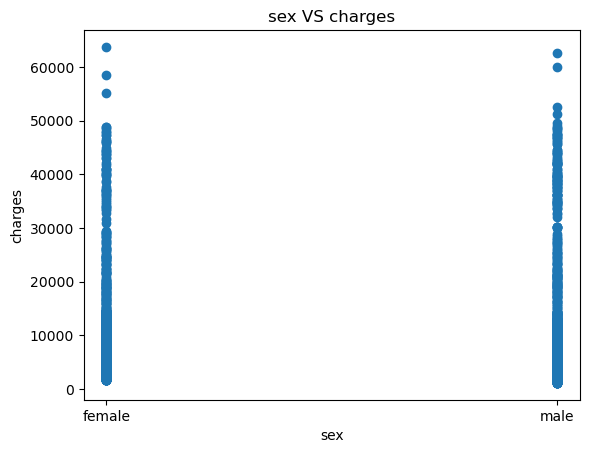

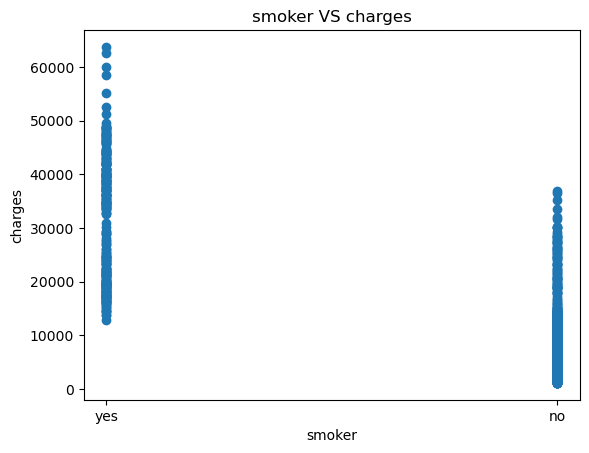

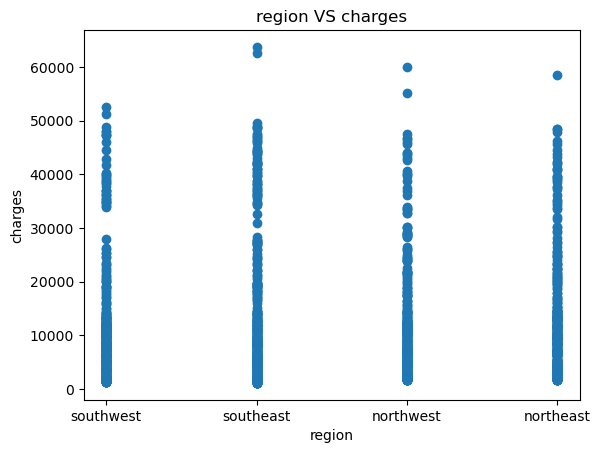

In [30]:
for c in ins_categorical:
    plt.scatter(ins[c], ins["charges"])
    plt.title(f"{c} VS charges")
    plt.xlabel(f"{c}")
    plt.ylabel("charges")
    plt.show()

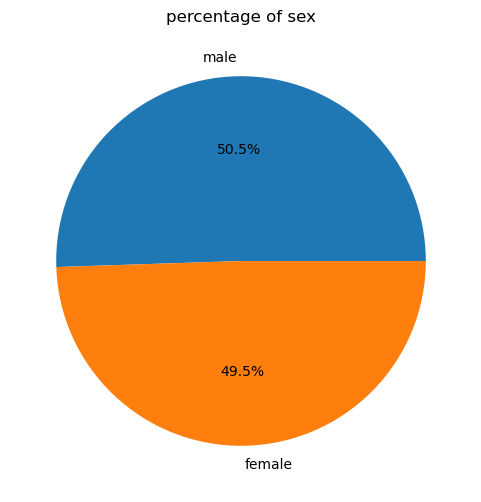

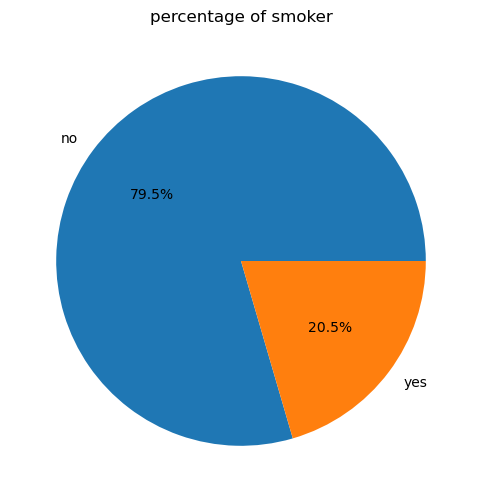

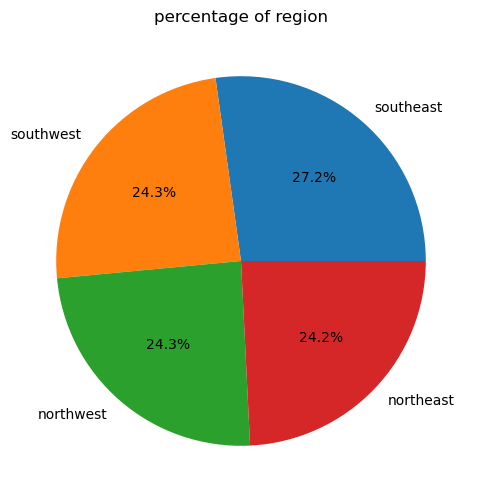

In [32]:
for c in  ins_categorical:
    s = ins[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()

DATA PREP

In [17]:
ins_dummies = pd.get_dummies(ins_categorical, drop_first=True)
ins_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [19]:
ins1 = ins.drop(['sex','smoker','region'] , axis = 1)
ins1  = pd.concat([ins1 , ins_dummies] , axis = 1)

In [20]:
ins1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [21]:
df_dup = ins1[ins1.duplicated()]
df_dup

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
581,19,30.59,0,1639.5631,1,0,1,0,0


In [23]:
ins1 = ins1.drop(index=[581] , axis=1)

In [36]:
ins1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(ins1, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['age','bmi','children','charges']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [44]:
df_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
967,0.355895,-0.861858,-0.061924,1,0,1,0,0
522,0.851393,0.529337,-0.901040,0,0,0,0,0
155,0.355895,1.441344,-0.901040,1,0,1,0,0
672,-0.210388,-0.156498,-0.901040,1,0,0,1,0
1173,-0.068817,-0.228091,0.777192,1,0,1,0,0
...,...,...,...,...,...,...,...,...
803,-1.484526,1.883923,-0.901040,0,1,0,1,0
53,-0.210388,0.613135,-0.901040,1,1,0,1,0
350,1.276106,-1.217386,-0.901040,0,0,1,0,0
79,0.143539,0.374760,-0.901040,0,0,1,0,0


In [38]:
y_train = df_train.pop('charges')
X_train = df_train

In [39]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)


print(lm.coef_)
print(lm.intercept_)

[ 0.3018687   0.15203554  0.05416575 -0.01565778  1.93937446 -0.02975491
 -0.04657396 -0.09570928]
-0.3442586309815486


In [43]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
lm1 = sm.OLS(y_train, X_train).fit()   
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.725
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              305.9
Date:                Mon, 07 Aug 2023   Prob (F-statistic):                   5.61e-254
Time:                        00:45:06   Log-Likelihood:                         -722.73
No. Observations:                 935   AIC:                                      1461.
Df Residuals:                     927   BIC:                                      1500.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

SINCE LINEAR REGRESSION GIVES US AN R^2 VALUE OF 75% ITS BEETER TO APPLY ANOTHER ALGORITHM

USING DECISION TREE AALGORITHM

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [46]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
967,0.355895,-0.861858,-0.061924,1,0,1,0,0
522,0.851393,0.529337,-0.901040,0,0,0,0,0
155,0.355895,1.441344,-0.901040,1,0,1,0,0
672,-0.210388,-0.156498,-0.901040,1,0,0,1,0
1173,-0.068817,-0.228091,0.777192,1,0,1,0,0
...,...,...,...,...,...,...,...,...
803,-1.484526,1.883923,-0.901040,0,1,0,1,0
53,-0.210388,0.613135,-0.901040,1,1,0,1,0
350,1.276106,-1.217386,-0.901040,0,0,1,0,0
79,0.143539,0.374760,-0.901040,0,0,1,0,0


NameError: name 'y_test' is not defined

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100